# Abgabe (Modul: Digitale Bildverarbeitung und Mustererkennung)
## Jonas Neuner
### 05.01.2024

In [1]:
%pip install tensorflow
%pip install scipy
import datetime 
import scipy
from IPython.display import display, clear_output
import tensorflow as tf  
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


### Loading the MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #60000 10000

### Selection of the first 3000 images of the MNIST dataset
(not selected for the training data, but documented for the report)

In [3]:
x_reduced = x_train [:3000] 
y_reduced = y_train [:3000]

### Sorting the dataset by digits

In [4]:
idx = np.argsort(y_train)
x_train_sorted = x_train[idx]
y_train_sorted = y_train[idx]

Manual selection of digits and their quantity

In [5]:
a01 = np.array(x_train_sorted[:100])
a02 = np.array(y_train_sorted[:100])

a11 = np.array(x_train_sorted[5923:6123])#+100
a12 = np.array(y_train_sorted[5923:6123])#+100

a21 = np.array(x_train_sorted[12665:12765])
a22 = np.array(y_train_sorted[12665:12765])

a31 = np.array(x_train_sorted[18623:18723])
a32 = np.array(y_train_sorted[18623:18723])

a41 = np.array(x_train_sorted[24754:24854])
a42 = np.array(y_train_sorted[24754:24854])

a51 = np.array(x_train_sorted[30596:30696])
a52 = np.array(y_train_sorted[30596:30696])

a61 = np.array(x_train_sorted[36017:36117])
a62 = np.array(y_train_sorted[36017:36117])

a71 = np.array(x_train_sorted[41935:42147])#+12 +100
a72 = np.array(y_train_sorted[41935:42147])#+12 +100

a81 = np.array(x_train_sorted[48200:48300])
a82 = np.array(y_train_sorted[48200:48300])

a91 = np.array(x_train_sorted[54051:54263])#+12 +100
a92 = np.array(y_train_sorted[54051:54263])#+12 +100

### Selection of training data concatenate to one array
a (training data) /
b (labels)

In [7]:
a = np.concatenate([a01, a11, a21, a31, a41, a51, a61, a71, a81, a91])
b = np.concatenate([a02, a12, a22, a32, a42, a52, a62, a72, a82, a92])

In [8]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)

print('x_test:', x_test.shape)
print('y_test:', y_test.shape)
print('x_reduced:', x_reduced.shape)
print('y_reduced:', y_reduced.shape)
print('x_train_sorted:', x_train_sorted.shape)
print('y_train_sorted:', y_train_sorted.shape)

print('a:', a.shape)
print('b:', b.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)
x_reduced: (3000, 28, 28)
y_reduced: (3000,)
x_train_sorted: (60000, 28, 28)
y_train_sorted: (60000,)
a: (1324, 28, 28)
b: (1324,)


In [9]:
x_train_normalized = x_train/255 
x_test_normalized = x_test/255
x_reduced_normalized = x_reduced/255 
x_train_sorted_normalized = x_train_sorted/255 

a_normalized = a/255

x_train= x_train_normalized.reshape(-1, 28, 28, 1)
x_test = x_test_normalized.reshape(-1, 28, 28, 1)
x_reduced = x_reduced_normalized.reshape(-1, 28, 28, 1) 
x_train_sorted = x_train_sorted_normalized.reshape(-1, 28, 28, 1)

a = a_normalized.reshape(-1, 28, 28, 1)


 Plot of the first 25 samples in the MNIST training set


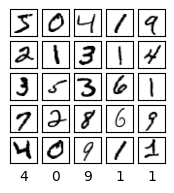

In [10]:
# Plotting data samples (MNIST)
print('\n Plot of the first 25 samples in the MNIST training set')
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(2,2))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


 Plot of the first 25 sorted samples in the MNIST training set


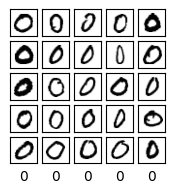

In [11]:
# Plotting data samples (sorted MNIST)
print('\n Plot of the first 25 sorted samples in the MNIST training set')
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(2,2))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_sorted[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_sorted[i])
plt.show()

In [12]:
#  figuring out the range of digits 
print('\n digits')
print(y_train_sorted[5922])
print(y_train_sorted[11844])
print(y_train_sorted[12664])
print(y_train_sorted[12665])
print(y_train_sorted[18622])
print(y_train_sorted[18623])
print(y_train_sorted[24753])
print(y_train_sorted[24754])
print(y_train_sorted[30595])
print(y_train_sorted[30596])
print(y_train_sorted[36016])
print(y_train_sorted[36017])
print(y_train_sorted[41934])
print(y_train_sorted[41935])
print(y_train_sorted[48199])
print(y_train_sorted[48200])
print(y_train_sorted[54050])
print(y_train_sorted[54051])
print(y_train_sorted[59999])


 digits
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9



 Plot of the sorted and selected training data


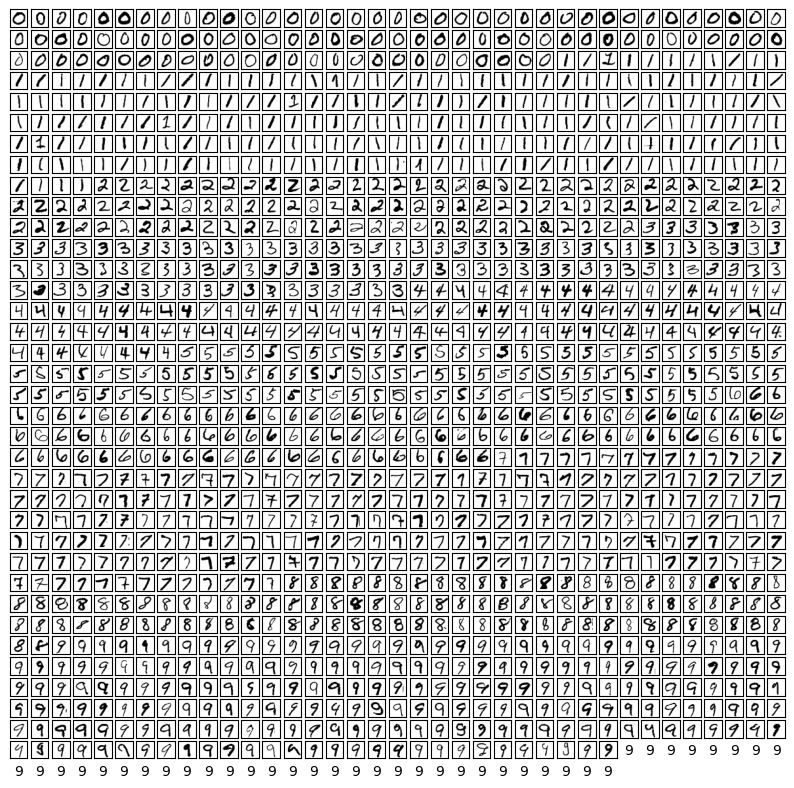

In [13]:
# Plotting data (complete training data)
print('\n Plot of the sorted and selected training data')
numbers_to_display = 1324
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(a[i], cmap=plt.cm.binary)
    plt.xlabel(b[i])
plt.show()

In [14]:
input_shape = (28, 28, 1)
marvin = tf.keras.models.Sequential([
  tf.keras.Input(shape=input_shape),
  tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation="softmax"),
])

In [15]:
marvin.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [16]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#Augmentation (rotation, shift, shear, zoom ... randomly)
datagen = ImageDataGenerator(rotation_range=20, # motating the images (up to 25°)
                             width_shift_range=0.09, # moving images from left to right
                             height_shift_range=0.0005, # moving images from top to bottom
                             shear_range=0.01, 
                             zoom_range=0.01, # Zooming up to 20%
                           # zca_whitening= True ,
                           # horizontal_flip=False, 
                           # vertical_flip=False,
                            fill_mode = 'nearest')

#Callback function to change the learning rate dynamicly
callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="loss",
    factor=0.99,
    patience=2,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.0,
)

In [17]:
#datagen.fit(a)


 Plot samples of the augmented training data
6
9
0
0
3
9
9
2
4


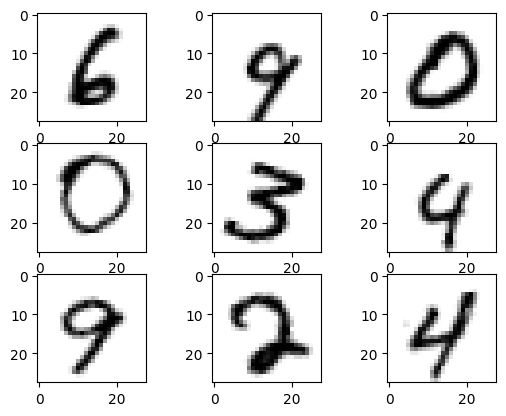

In [18]:
#Examples of the augmented training data
print('\n Plot samples of the augmented training data')
for X_batch, y_batch in datagen.flow(a, b, batch_size=9):
    for i in range(0,9):
        plt.subplot(330 + 1 + i)
        plt.grid(False)
        plt.imshow(X_batch[i][:,:,0],cmap=plt.cm.binary)
        print(y_batch[i])
    break

In [19]:
marvin.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.003),
              loss=loss_fn ,
              metrics=['accuracy'])

In [20]:
marvin.fit(
  datagen.flow(a, b, batch_size=64), 
    epochs=99,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[callback], 
)

Epoch 1/99


C:\Users\Jonas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


21/21 [==============================] - 4s 144ms/step - loss: 1.8401 - accuracy: 0.3512 - val_loss: 0.8067 - val_accuracy: 0.7485 - lr: 0.0030
Epoch 2/99
21/21 [==============================] - 3s 128ms/step - loss: 0.9472 - accuracy: 0.6782 - val_loss: 0.4475 - val_accuracy: 0.8574 - lr: 0.0030
Epoch 3/99
21/21 [==============================] - 3s 134ms/step - loss: 0.6215 - accuracy: 0.8044 - val_loss: 0.2570 - val_accuracy: 0.9191 - lr: 0.0030
Epoch 4/99
21/21 [==============================] - 3s 131ms/step - loss: 0.5012 - accuracy: 0.8384 - val_loss: 0.1856 - val_accuracy: 0.9462 - lr: 0.0030
Epoch 5/99
21/21 [==============================] - 3s 139ms/step - loss: 0.4172 - accuracy: 0.8708 - val_loss: 0.1729 - val_accuracy: 0.9462 - lr: 0.0030
Epoch 6/99
21/21 [==============================] - 3s 131ms/step - loss: 0.3360 - accuracy: 0.8965 - val_loss: 0.1338 - val_accuracy: 0.9609 - lr: 0.0030
Epoch 7/99
21/21 [==============================] - 3s 132ms/step - loss: 0.3072 